# Predictive Modelling on Customer Churn in a Telecom Company

**Problem Statement**

The dataset provided has labelled data on more than 7,000 customers indicating whether they churned or not while also containing information on demographics, their tenure with the company, the kind of services they have opted for, their monthly charges, etc.

Based on the data, a ML predictive model is built that can help predict whether a customer is about to leave the company.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_regression
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
import optuna

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Uploading Dataset and Splitting into Training and Validation Sets

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1 = df.sample(frac=0.8, random_state=17)
df_trainX = df1.drop(columns=['Churn'])
df_trainY = df1[['Churn']].copy()
df_trainY['Churn'] = df_trainY['Churn'].map({'Yes': 1, 'No': 0})

df_trainX.head()
df_trainX.shape

df_trainY.head()
df_trainY.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3616,8707-RMEZH,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55
2055,1216-BGTSP,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.7
5394,5118-MUEYH,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55
3697,4821-SJHJV,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.8
2516,8245-UMPYT,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.2


(5634, 20)

,Churn
3616,0
2055,0
5394,0
3697,0
2516,1


(5634, 1)

In [218]:
df2 = df.drop(df1.index)
unseenX = df2.drop(columns=['Churn'])
unseenY = df2[['Churn']].copy()
unseenY['Churn'] = unseenY['Churn'].map({'Yes': 1, 'No': 0})

unseenX.head()
unseenX.shape

unseenY.head()
unseenY.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15


(1409, 20)

,Churn
1,0
4,1
11,0
12,0
15,0


(1409, 1)

## EDA and Data Cleaning

In [219]:
df_trainX.info()
df_trainX.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3616 to 1832
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.162052,32.496628,65.057233
std,0.368531,24.716020,30.130263
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.900000
50%,0.000000,29.000000,70.550000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [220]:
#dropping irrelevant feature (customerID)

df_trainX=df_trainX.drop(columns=['customerID'])
unseenX=unseenX.drop(columns=['customerID'])

In [221]:
#Checking for any null values

df_trainX = df_trainX.replace(' ', np.nan)
df_trainX.isnull().sum()

unseenX = unseenX.replace(' ', np.nan)
unseenX.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [222]:
#Since the instances of missing values are low, we can use 'mean' imputation

mean_imputer = SimpleImputer(strategy='mean')
df_trainX['TotalCharges'] = mean_imputer.fit_transform(df_trainX['TotalCharges'].values.reshape(-1,1))
unseenX['TotalCharges'] = mean_imputer.fit_transform(unseenX['TotalCharges'].values.reshape(-1,1))

df_trainX.isnull().sum()
unseenX.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [223]:
df_trainX.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [224]:
#changing tenure to categorical variable

cat_col=['tenure']
df_trainX[cat_col] = df_trainX[cat_col].astype('category')
unseenX[cat_col] = unseenX[cat_col].astype('category')

df_trainX[cat_col].dtypes
unseenX[cat_col].dtypes

tenure    category
dtype: object

tenure    category
dtype: object

In [225]:
#checking data balance
df_trainY['Churn'].value_counts(normalize=True)

0    0.731807
1    0.268193
Name: Churn, dtype: float64

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

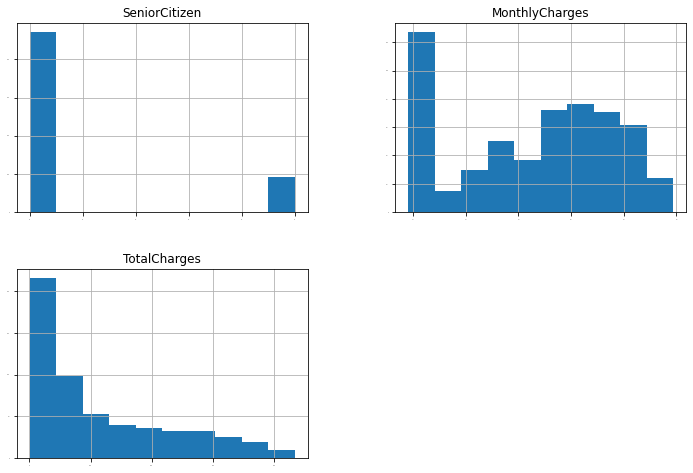

In [226]:
df_trainX.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,8))
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

<AxesSubplot:title={'center':'Correlation Matrix'}>

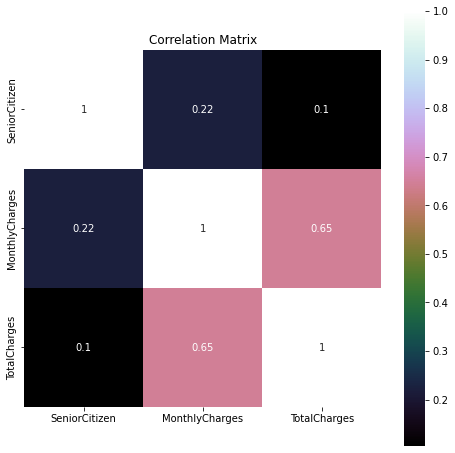

In [13]:
correlation = df_trainX.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 576x576 with 0 Axes>

array([[<AxesSubplot:xlabel='SeniorCitizen', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='SeniorCitizen'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='TotalCharges'>]],
      dtype=object)

<Figure size 576x576 with 0 Axes>

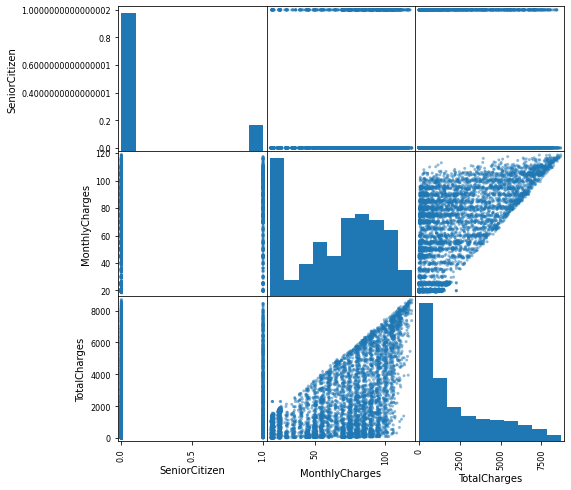

In [14]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(8,8))
scatter_matrix(df_trainX,figsize=(8,8))
plt.show()

## Train Test Split

In [15]:
X = df_trainX
y = df_trainY['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

## Encoding Categorical Variables

In [16]:
te = PolynomialWrapper(ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True))
te.fit(df_trainX[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']],df_trainY['Churn'].tolist())

temptrain_te=te.transform(X_train[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

temptest_te=te.transform(X_test[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."


In [17]:
X_train=pd.concat([X_train,temptrain_te], axis=1)

X_test=pd.concat([X_test,temptest_te], axis=1)

In [18]:
X_train.drop(columns=['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],inplace=True)
X_test.drop(columns=['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],inplace=True)

In [19]:
X_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_1,Partner_1,Dependents_1,tenure_1,PhoneService_1,MultipleLines_1,InternetService_1,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_1,PaperlessBilling_1,PaymentMethod_1
6777,0,29.90,92.25,0.265133,0.200146,0.316430,0.503185,0.245318,0.245318,0.192752,0.421858,0.402997,0.402174,0.149475,0.338072,0.341054,0.436181,0.338526,0.454257
3430,0,95.95,5036.90,0.265133,0.332987,0.155621,0.178571,0.270588,0.255382,0.418854,0.146053,0.218061,0.217684,0.420865,0.338072,0.301895,0.112245,0.165941,0.454257
6267,0,70.10,70.10,0.271271,0.332987,0.316430,0.622718,0.270588,0.255382,0.418854,0.421858,0.402997,0.402174,0.420865,0.338072,0.341054,0.436181,0.338526,0.454257
2216,1,108.95,7111.30,0.271271,0.332987,0.316430,0.059701,0.270588,0.287614,0.418854,0.146053,0.402997,0.217684,0.149475,0.304107,0.301895,0.436181,0.338526,0.170593
6158,0,19.65,31.20,0.265133,0.332987,0.316430,0.535714,0.270588,0.255382,0.074836,0.074836,0.074836,0.074836,0.074836,0.074836,0.074836,0.436181,0.338526,0.454257


## Scaling Datasets (Multiple Configurations)

### Standardization

In [20]:
scaler= StandardScaler()
scaler.fit(X_train)

X_train_names=list(X_train)

X_train_tempstd=scaler.transform(X_train)

X_train_std = X_train.copy()
for i in range(X_train_tempstd.shape[1]):
    X_train_std[X_train_names[i]] = X_train_tempstd[:,i]

X_test_names=list(X_test)

X_test_tempstd=scaler.transform(X_test)

X_test_std = X_test.copy()
for i in range(X_test_tempstd.shape[1]):
    X_test_std[X_train_names[i]] = X_test_tempstd[:,i]

StandardScaler()

### Normalization

In [21]:
scaler= MinMaxScaler()
scaler.fit(X_train)

X_train_tempmm=scaler.transform(X_train)

X_train_mm = X_train.copy()
for i in range(X_train_tempmm.shape[1]):
    X_train_mm[X_train_names[i]] = X_train_tempmm[:,i]

X_test_tempmm=scaler.transform(X_test)

X_test_mm = X_test.copy()
for i in range(X_test_tempmm.shape[1]):
    X_test_mm[X_train_names[i]] = X_test_tempmm[:,i]

MinMaxScaler()

### Log

In [22]:
scaler= FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_train)

X_train_templog=scaler.transform(X_train)

X_train_log = X_train.copy()
for i in range(X_train_templog.shape[1]):
    X_train_log[X_train_names[i]] = X_train_templog[:,i]

X_test_templog=scaler.transform(X_test)

X_test_log = X_test.copy()
for i in range(X_test_templog.shape[1]):
    X_test_log[X_train_names[i]] = X_test_templog[:,i]

FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

### Yeo-Johnson

In [23]:
scaler= PowerTransformer(method='yeo-johnson')
scaler.fit(X_train)

X_train_tempyj=scaler.transform(X_train)

X_train_yj = X_train.copy()
for i in range(X_train_tempyj.shape[1]):
    X_train_yj[X_train_names[i]] = X_train_tempyj[:,i]

X_test_tempyj=scaler.transform(X_test)

X_test_yj = X_test.copy()
for i in range(X_test_tempyj.shape[1]):
    X_test_yj[X_train_names[i]] = X_test_tempyj[:,i]

PowerTransformer()

## Estimating Feature Importance

,Score
Specs,
Contract_1,974.252290
tenure_1,869.854228
TechSupport_1,625.697303
OnlineSecurity_1,608.166751
InternetService_1,533.568861
PaymentMethod_1,476.207600
OnlineBackup_1,420.244678
DeviceProtection_1,416.205105
StreamingMovies_1,260.301868


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Specs'>

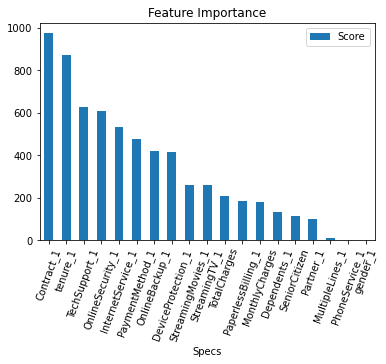

In [24]:
Y= y_train
X= X_train

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(20,'Score').set_index('Specs')
featureScores.nlargest(20,'Score').plot.bar(x="Specs",y="Score",rot=70, title="Feature Importance")

## Basic ML Algorithms

### 1) Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=17)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       841
           1       0.58      0.66      0.62       286

    accuracy                           0.79      1127
   macro avg       0.73      0.75      0.74      1127
weighted avg       0.80      0.79      0.80      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

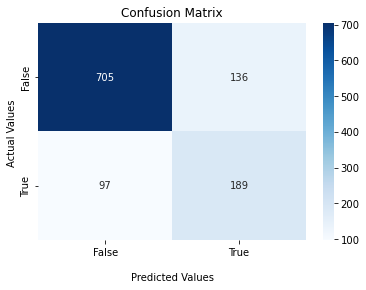

In [25]:
clf = DecisionTreeClassifier(random_state = 17, criterion = "entropy",
                             min_samples_split = 10, min_samples_leaf = 10, max_depth = 10, max_leaf_nodes = 10)

clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

class_names = [str(x) for x in clf.classes_]
print(classification_report(y_test,y_pred_dt,target_names=class_names))

cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(cf_matrix_dt, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 2) KNN

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       841
           1       0.59      0.49      0.54       286

    accuracy                           0.78      1127
   macro avg       0.71      0.69      0.70      1127
weighted avg       0.77      0.78      0.78      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

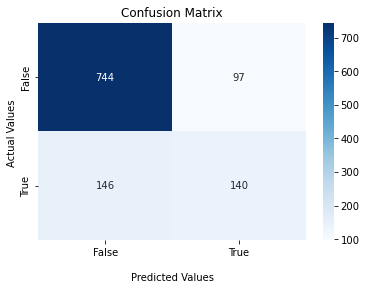

In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)

y_pred_knn = knn_clf.predict(X_test)

print(classification_report(y_test,y_pred_knn,target_names=class_names))

cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ax = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 3) SVM

SVC(C=0.025, kernel='linear')

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       841
           1       0.63      0.52      0.57       286

    accuracy                           0.80      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.79      0.80      0.80      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

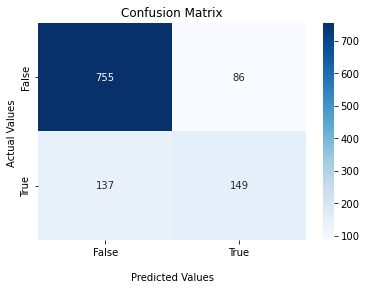

In [27]:
svm_clf = SVC(kernel="linear", C=0.025)
svm_clf.fit(X_train,y_train)

y_pred_svm = svm_clf.predict(X_test)

print(classification_report(y_test,y_pred_svm,target_names=class_names))

cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix_svm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 4) LR

LogisticRegression(max_iter=5000, random_state=17)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       841
           1       0.65      0.60      0.62       286

    accuracy                           0.82      1127
   macro avg       0.76      0.74      0.75      1127
weighted avg       0.81      0.82      0.81      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

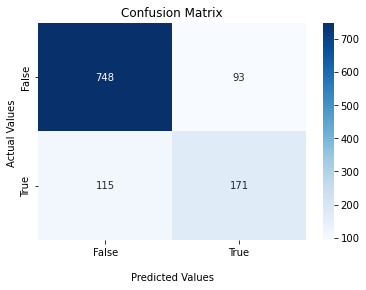

In [28]:
lr_clf= LogisticRegression(random_state=17, max_iter=5000)
lr_clf.fit(X_train,y_train)

y_pred_lr = lr_clf.predict(X_test)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 5) Naive Bayes

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       841
           1       0.48      0.85      0.61       286

    accuracy                           0.73      1127
   macro avg       0.70      0.77      0.70      1127
weighted avg       0.81      0.73      0.74      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

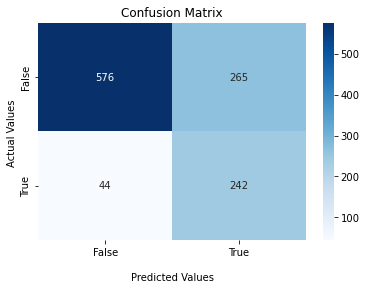

In [29]:
gnb=GaussianNB()
gnb=gnb.fit(X_train,y_train)

y_pred_nb = gnb.predict(X_test)

print(classification_report(y_test,y_pred_nb,target_names=class_names))

cf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
ax = sns.heatmap(cf_matrix_nb, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Ensemble ML Algorithms

### 1) Random Forest

RandomForestClassifier(random_state=17)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       841
           1       0.60      0.50      0.55       286

    accuracy                           0.79      1127
   macro avg       0.72      0.69      0.70      1127
weighted avg       0.78      0.79      0.78      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

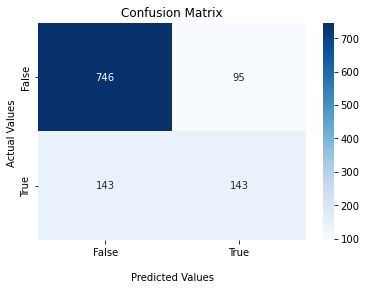

In [35]:
clf_rf= RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=17)
clf_rf.fit(X_train,y_train)

y_pred_rf = clf_rf.predict(X_test)

print(classification_report(y_test,y_pred_rf,target_names=class_names))

cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 2) Extra Trees

ExtraTreesClassifier(random_state=17)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       841
           1       0.58      0.49      0.53       286

    accuracy                           0.78      1127
   macro avg       0.71      0.68      0.69      1127
weighted avg       0.77      0.78      0.77      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

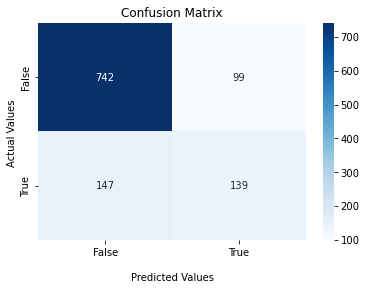

In [36]:
clf_et = ExtraTreesClassifier(n_estimators=100,max_depth=None, min_samples_split=2,random_state=17)
clf_et.fit(X_train,y_train)

y_pred_et = clf_et.predict(X_test)

print(classification_report(y_test,y_pred_et,target_names=class_names))

cf_matrix_et = confusion_matrix(y_test, y_pred_et)
ax = sns.heatmap(cf_matrix_et, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 3) Gradient Tree Boosting

GradientBoostingClassifier(max_depth=1, max_features=1, random_state=17)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       841
           1       0.70      0.49      0.57       286

    accuracy                           0.82      1127
   macro avg       0.77      0.71      0.73      1127
weighted avg       0.81      0.82      0.80      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

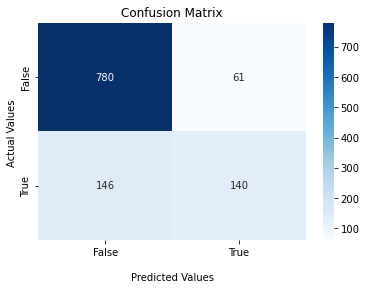

In [37]:
clf_gt = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1, max_depth=1,max_features=1,random_state=17)
clf_gt.fit(X_train,y_train)

y_pred_gt = clf_gt.predict(X_test)

print(classification_report(y_test,y_pred_gt,target_names=class_names))

cf_matrix_gt = confusion_matrix(y_test, y_pred_gt)
ax = sns.heatmap(cf_matrix_gt, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 4) XGBoost

XGBClassifier()

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       841
           1       0.62      0.54      0.58       286

    accuracy                           0.80      1127
   macro avg       0.73      0.71      0.72      1127
weighted avg       0.79      0.80      0.79      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

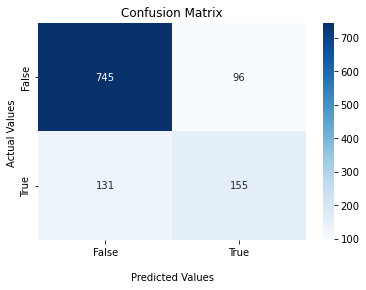

In [38]:
clf_xgb=XGBClassifier(n_estimators=100,max_depth=3)
clf_xgb.fit(X_train,y_train)

y_pred_xgb = clf_xgb.predict(X_test)

print(classification_report(y_test,y_pred_xgb,target_names=class_names))

cf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ax = sns.heatmap(cf_matrix_xgb, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 5) LGBM

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       841
           1       0.60      0.57      0.58       286

    accuracy                           0.79      1127
   macro avg       0.73      0.72      0.72      1127
weighted avg       0.79      0.79      0.79      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

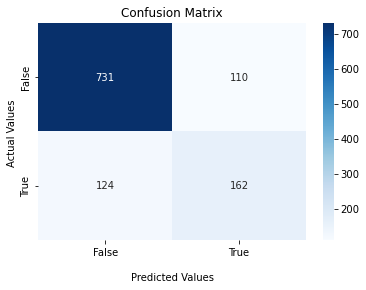

In [40]:
LGBM = LGBMClassifier()
LGBM.fit(X_train,y_train)

y_pred_lgbm = LGBM.predict(X_test)

print(classification_report(y_test,y_pred_lgbm,target_names=class_names))

cf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
ax = sns.heatmap(cf_matrix_lgbm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 6) Boosting with Logistic Regression (AdaBoost)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=5000,
                                                     random_state=17))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       841
           1       0.62      0.49      0.55       286

    accuracy                           0.79      1127
   macro avg       0.73      0.69      0.71      1127
weighted avg       0.78      0.79      0.78      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

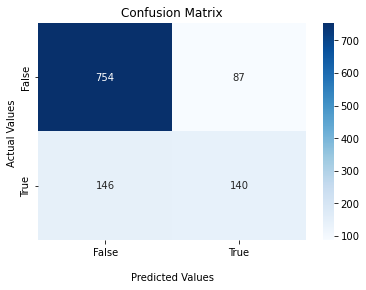

In [41]:
clf_ada_lr= AdaBoostClassifier(base_estimator=LogisticRegression(random_state=17, max_iter=5000))
clf_ada_lr.fit(X_train, y_train)

y_pred_ada = clf_ada_lr.predict(X_test)

print(classification_report(y_test,y_pred_ada,target_names=class_names))

cf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
ax = sns.heatmap(cf_matrix_ada, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 7) Bagging with Logistic Regression

BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000,
                                                    random_state=17))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.66      0.58      0.62       286

    accuracy                           0.82      1127
   macro avg       0.76      0.74      0.75      1127
weighted avg       0.81      0.82      0.81      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

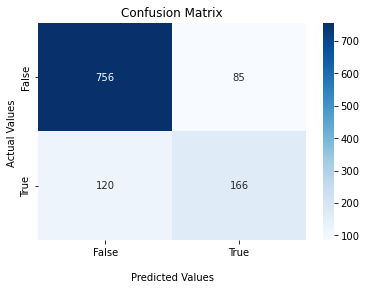

In [43]:
bag_lr = BaggingClassifier(LogisticRegression(random_state=17, max_iter=5000))
bag_lr.fit(X_train, y_train)

y_pred_bag = bag_lr.predict(X_test)

print(classification_report(y_test,y_pred_bag,target_names=class_names))

cf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
ax = sns.heatmap(cf_matrix_bag, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 8) Stacking with Gradient Tree Boosting, Decision Trees and Logistic Regression

StackingClassifier(classifiers=(GradientBoostingClassifier(max_depth=1,
                                                           max_features=1,
                                                           random_state=17),
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=10,
                                                       min_samples_leaf=10,
                                                       min_samples_split=10,
                                                       random_state=17)),
                   meta_classifier=LogisticRegression(max_iter=5000,
                                                      random_state=17),
                   use_probas=True)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       841
           1       0.62      0.61      0.61       286

    accuracy                           0.80      1127
   macro avg       0.74      0.74      0.74      1127
weighted avg       0.80      0.80      0.80      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

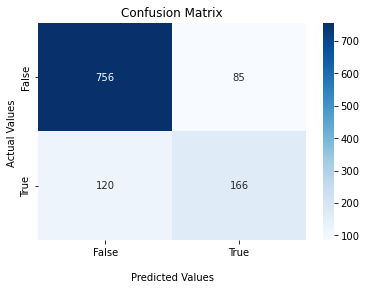

In [53]:
stack = StackingClassifier(classifiers=(clf_gt,clf),
                            meta_classifier=lr_clf,
                            use_probas=True,average_probas=False)
stack.fit(X_train, y_train)

y_pred_stack = stack.predict(X_test)

print(classification_report(y_test,y_pred_stack,target_names=class_names))

cf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
ax = sns.heatmap(cf_matrix_bag, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Finding the best scaled dataset with Logistic Regression

In [56]:
lr_clf= LogisticRegression(random_state=17, max_iter=5000)

LogisticRegression(max_iter=5000, random_state=17)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.65      0.56      0.60       286

    accuracy                           0.81      1127
   macro avg       0.75      0.73      0.74      1127
weighted avg       0.80      0.81      0.81      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

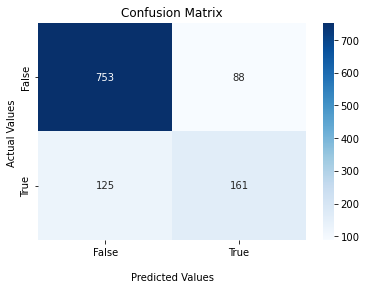

In [57]:
#Using standardized dataset

lr_clf= LogisticRegression(random_state=17, max_iter=5000)
lr_clf.fit(X_train_std,y_train)

y_pred_lr = lr_clf.predict(X_test_std)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

LogisticRegression(max_iter=5000, random_state=17)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       841
           1       0.65      0.55      0.59       286

    accuracy                           0.81      1127
   macro avg       0.75      0.72      0.73      1127
weighted avg       0.80      0.81      0.80      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

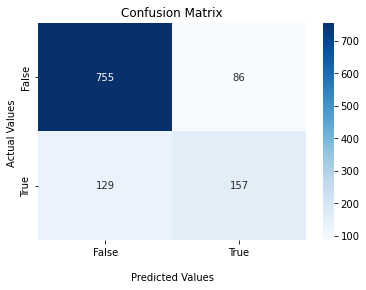

In [58]:
#Using normalized dataset

lr_clf= LogisticRegression(random_state=17, max_iter=5000)
lr_clf.fit(X_train_mm,y_train)

y_pred_lr = lr_clf.predict(X_test_mm)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

LogisticRegression(max_iter=5000, random_state=17)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.67      0.57      0.61       286

    accuracy                           0.82      1127
   macro avg       0.76      0.74      0.75      1127
weighted avg       0.81      0.82      0.81      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

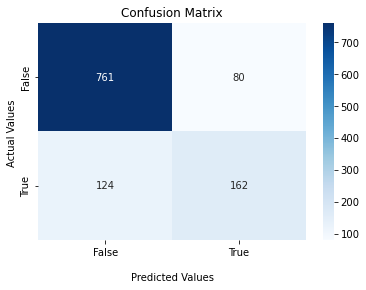

In [59]:
#Using log transformed dataset

lr_clf= LogisticRegression(random_state=17, max_iter=5000)
lr_clf.fit(X_train_log,y_train)

y_pred_lr = lr_clf.predict(X_test_log)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

LogisticRegression(max_iter=5000, random_state=17)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       841
           1       0.64      0.57      0.60       286

    accuracy                           0.81      1127
   macro avg       0.75      0.73      0.74      1127
weighted avg       0.80      0.81      0.81      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

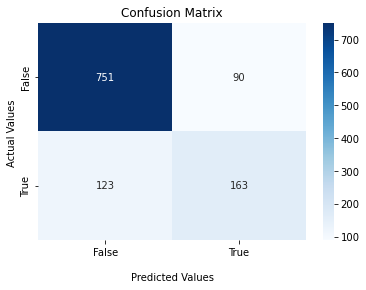

In [60]:
#Using Yeo-Johnson dataset

lr_clf= LogisticRegression(random_state=17, max_iter=5000)
lr_clf.fit(X_train_yj,y_train)

y_pred_lr = lr_clf.predict(X_test_yj)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Hyperparameter Tuning

In [64]:
tempfulltrain_te=te.transform(df_trainX[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])
tempfulltest_te=te.transform(unseenX[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

In [65]:
X_te=pd.concat([df_trainX,tempfulltrain_te], axis=1)
unseenX_te=pd.concat([unseenX,tempfulltest_te], axis=1)

In [66]:
X_te.drop(columns=['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],inplace=True)

unseenX_te.drop(columns=['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],inplace=True)

In [67]:
X_te_names=list(X_te)

scaler= FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_te)

fullX_te_log=scaler.transform(X_te)

X_te_log = X_te.copy()

for i in range(fullX_te_log.shape[1]):
    X_te_log[X_te_names[i]] = fullX_te_log[:,i]

FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

In [68]:
unseenX_te_names=list(unseenX_te)

fullunseenX_te_log=scaler.transform(unseenX_te)

unseenX_te_log = unseenX_te.copy()

for i in range(fullunseenX_te_log.shape[1]):
    unseenX_te_log[unseenX_te_names[i]] = fullunseenX_te_log[:,i]

In [70]:
X_te_log.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_1,Partner_1,Dependents_1,tenure_1,PhoneService_1,MultipleLines_1,InternetService_1,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_1,PaperlessBilling_1,PaymentMethod_1
3616,0.693147,4.480740,8.708896,0.240017,0.182443,0.274924,0.084899,0.23948,0.227440,0.34985,0.136324,0.197260,0.338024,0.351266,0.291230,0.263821,0.106380,0.153528,0.137389
2055,0.000000,4.695468,8.510310,0.235177,0.287422,0.274924,0.105361,0.23948,0.252791,0.34985,0.136324,0.338611,0.196950,0.139305,0.265519,0.263821,0.361987,0.291569,0.137389
5394,0.000000,4.664382,8.533962,0.240017,0.182443,0.274924,0.133531,0.23948,0.252791,0.34985,0.351965,0.197260,0.338024,0.139305,0.265519,0.263821,0.361987,0.291569,0.137389
3697,0.000000,4.506454,7.973431,0.240017,0.182443,0.144638,0.249461,0.23948,0.252791,0.34985,0.136324,0.338611,0.338024,0.351266,0.265519,0.293456,0.361987,0.153528,0.374495
2516,0.693147,4.578826,7.366572,0.240017,0.287422,0.274924,0.312375,0.23948,0.252791,0.34985,0.351965,0.338611,0.338024,0.351266,0.265519,0.263821,0.361987,0.291569,0.374495


In [140]:
def objective_lr(trial,X_train_log,y_train):
    
    hyper_params_lr = {
        "class_weight": trial.suggest_categorical("class_weight",["balanced",None]),
        "max_iter": trial.suggest_int("max_iter",100,1000,step=10),
        "multi_class": trial.suggest_categorical("multi_class",["auto","ovr","multinomial"]),
        "C": trial.suggest_float("C",0.1,10,step=0.1),    
        "random_state": 17,
}

    
    
    LR = LogisticRegression(**hyper_params_lr)
    
    cv_scores_lr = cross_val_score(LR,X_train_log,y_train,cv=2,scoring="f1_micro")
    score = np.mean(cv_scores_lr)
    
    return score

In [141]:
study = optuna.create_study(direction="maximize")

[I 2022-09-20 23:37:49,247] A new study created in memory with name: no-name-ca7e9933-4970-4f41-9b8b-f0f9ae23909a


In [142]:
study.optimize(lambda trial: objective_lr(trial, X_train_log,y_train), n_trials=1000,  gc_after_trial=True)

[I 2022-09-20 23:37:50,925] Trial 0 finished with value: 0.7659207027916244 and parameters: {'class_weight': 'balanced', 'max_iter': 440, 'multi_class': 'multinomial', 'C': 3.1}. Best is trial 0 with value: 0.7659207027916244.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in

[I 2022-09-20 23:38:07,481] Trial 18 finished with value: 0.8003120949647733 and parameters: {'class_weight': None, 'max_iter': 900, 'multi_class': 'ovr', 'C': 4.2}. Best is trial 14 with value: 0.8007559476056966.
[I 2022-09-20 23:38:08,158] Trial 19 finished with value: 0.8000903655620761 and parameters: {'class_weight': None, 'max_iter': 620, 'multi_class': 'ovr', 'C': 2.8000000000000003}. Best is trial 14 with value: 0.8007559476056966.
[I 2022-09-20 23:38:08,792] Trial 20 finished with value: 0.8009778739261582 and parameters: {'class_weight': None, 'max_iter': 1000, 'multi_class': 'ovr', 'C': 4.9}. Best is trial 20 with value: 0.8009778739261582.
[I 2022-09-20 23:38:09,492] Trial 21 finished with value: 0.8007559476056966 and parameters: {'class_weight': None, 'max_iter': 980, 'multi_class': 'ovr', 'C': 4.8}. Best is trial 20 with value: 0.8009778739261582.
[I 2022-09-20 23:38:10,212] Trial 22 finished with value: 0.8007559476056966 and parameters: {'class_weight': None, 'max_ite

[I 2022-09-20 23:38:33,886] Trial 54 finished with value: 0.8014219234848458 and parameters: {'class_weight': None, 'max_iter': 670, 'multi_class': 'auto', 'C': 1.2000000000000002}. Best is trial 37 with value: 0.801422021943728.
[I 2022-09-20 23:38:34,532] Trial 55 finished with value: 0.8007562429823432 and parameters: {'class_weight': None, 'max_iter': 680, 'multi_class': 'auto', 'C': 1.3000000000000003}. Best is trial 37 with value: 0.801422021943728.
[I 2022-09-20 23:38:35,189] Trial 56 finished with value: 0.8012003909999129 and parameters: {'class_weight': None, 'max_iter': 730, 'multi_class': 'auto', 'C': 1.7000000000000002}. Best is trial 37 with value: 0.801422021943728.
[I 2022-09-20 23:38:35,745] Trial 57 finished with value: 0.7998687346182611 and parameters: {'class_weight': None, 'max_iter': 750, 'multi_class': 'auto', 'C': 0.9}. Best is trial 37 with value: 0.801422021943728.
[I 2022-09-20 23:38:36,748] Trial 58 finished with value: 0.7978715946518711 and parameters: {'

[I 2022-09-20 23:38:58,332] Trial 89 finished with value: 0.8007562429823432 and parameters: {'class_weight': None, 'max_iter': 760, 'multi_class': 'auto', 'C': 1.3000000000000003}. Best is trial 81 with value: 0.8016437513464252.
[I 2022-09-20 23:38:58,917] Trial 90 finished with value: 0.7976496683314095 and parameters: {'class_weight': None, 'max_iter': 770, 'multi_class': 'auto', 'C': 0.7000000000000001}. Best is trial 81 with value: 0.8016437513464252.
[I 2022-09-20 23:38:59,550] Trial 91 finished with value: 0.8009781693028049 and parameters: {'class_weight': None, 'max_iter': 810, 'multi_class': 'auto', 'C': 1.4000000000000001}. Best is trial 81 with value: 0.8016437513464252.
[I 2022-09-20 23:39:00,105] Trial 92 finished with value: 0.7952077895941565 and parameters: {'class_weight': None, 'max_iter': 820, 'multi_class': 'auto', 'C': 0.30000000000000004}. Best is trial 81 with value: 0.8016437513464252.
[I 2022-09-20 23:39:00,728] Trial 93 finished with value: 0.801643751346425

[I 2022-09-20 23:39:09,805] Trial 107 finished with value: 0.8012000956232663 and parameters: {'class_weight': None, 'max_iter': 220, 'multi_class': 'multinomial', 'C': 1.1}. Best is trial 101 with value: 0.8018658745846512.
[I 2022-09-20 23:39:10,330] Trial 108 finished with value: 0.7952077895941565 and parameters: {'class_weight': None, 'max_iter': 190, 'multi_class': 'auto', 'C': 0.30000000000000004}. Best is trial 101 with value: 0.8018658745846512.
[I 2022-09-20 23:39:10,895] Trial 109 finished with value: 0.7998687346182611 and parameters: {'class_weight': None, 'max_iter': 340, 'multi_class': 'auto', 'C': 0.9}. Best is trial 101 with value: 0.8018658745846512.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[I 2022-09-20 23:39:24,516] Trial 129 finished with value: 0.8007559476056966 and parameters: {'class_weight': None, 'max_iter': 270, 'multi_class': 'auto', 'C': 5.2}. Best is trial 101 with value: 0.8018658745846512.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:39:34,110] Trial 144 finished with value: 0.8003124888003021 and parameters: {'class_weight': None, 'max_iter': 140, 'multi_class': 'ovr', 'C': 1.0}. Best is trial 101 with value: 0.8018658745846512.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:39:46,143] Trial 164 finished with value: 0.7998687346182611 and parameters: {'class_weight': None, 'max_iter': 100, 'multi_class': 'ovr', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:40:08,369] Trial 200 finished with value: 0.8000903655620761 and parameters: {'class_weight': None, 'max_iter': 100, 'multi_class': 'multinomial', 'C': 1.6}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[I 2022-09-20 23:40:15,322] Trial 211 finished with value: 0.8014219234848458 and parameters: {'class_weight': None, 'max_iter': 210, 'multi_class': 'ovr', 'C': 1.2000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:40:22,087] Trial 222 finished with value: 0.8018655792080045 and parameters: {'class_weight': None, 'max_iter': 150, 'multi_class': 'ovr', 'C': 1.2000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:40:27,044] Trial 230 finished with value: 0.8012003909999129 and parameters: {'class_weight': None, 'max_iter': 170, 'multi_class': 'ovr', 'C': 1.7000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:40:40,733] Trial 253 finished with value: 0.8009781693028049 and parameters: {'class_weight': None, 'max_iter': 140, 'multi_class': 'ovr', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:40:46,075] Trial 261 finished with value: 0.8009781693028049 and parameters: {'class_weight': None, 'max_iter': 150, 'multi_class': 'ovr', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:41:15,267] Trial 307 finished with value: 0.8012003909999129 and parameters: {'class_weight': None, 'max_iter': 180, 'multi_class': 'ovr', 'C': 1.7000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:41:19,914] Trial 315 finished with value: 0.7996469067566817 and parameters: {'class_weight': None, 'max_iter': 120, 'multi_class': 'ovr', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:41:33,492] Trial 336 finished with value: 0.7992029556568763 and parameters: {'class_weight': None, 'max_iter': 130, 'multi_class': 'multinomial', 'C': 1.7000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:41:55,376] Trial 365 finished with value: 0.8007562429823432 and parameters: {'class_weight': None, 'max_iter': 160, 'multi_class': 'ovr', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[I 2022-09-20 23:42:02,534] Trial 376 finished with value: 0.7998687346182611 and parameters: {'class_weight': None, 'max_iter': 140, 'multi_class': 'ovr', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:42:20,094] Trial 404 finished with value: 0.8016437513464252 and parameters: {'class_weight': None, 'max_iter': 140, 'multi_class': 'ovr', 'C': 1.1}. Best is trial 155 with value: 0.8020875055284663.
[I 2022-09-20 23:42:20,638] Trial 405 finished with value: 0.7998687346182611 and parameters: {'class_weight': None, 'max_iter': 390, 'multi_class': 'ovr', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[I 2022-09-20 23:42:48,635] Trial 445 finished with value: 0.8003121934236556 and parameters: {'class_weight': None, 'max_iter': 330, 'multi_class': 'multinomial', 'C': 1.6}. Best is trial 155 with value: 0.8020875055284663.
[I 2022-09-20 23:42:49,361] Trial 446 finished with value: 0.8014219234848458 and parameters: {'class_weight': None, 'max_iter': 190, 'multi_class': 'ovr', 'C': 1.2000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:42:50,043] T

[I 2022-09-20 23:42:57,192] Trial 458 finished with value: 0.8009781693028049 and parameters: {'class_weight': None, 'max_iter': 190, 'multi_class': 'ovr', 'C': 1.4000000000000001}. Best is trial 155 with value: 0.8020875055284663.
[I 2022-09-20 23:42:58,409] Trial 459 finished with value: 0.8009781693028049 and parameters: {'class_weight': None, 'max_iter': 460, 'multi_class': 'multinomial', 'C': 0.7000000000000001}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData

[I 2022-09-20 23:43:03,481] Trial 467 finished with value: 0.8016437513464252 and parameters: {'class_weight': None, 'max_iter': 160, 'multi_class': 'ovr', 'C': 1.1}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

[I 2022-09-20 23:43:10,404] Trial 477 finished with value: 0.7956520360706085 and parameters: {'class_weight': None, 'max_iter': 200, 'multi_class': 'ovr', 'C': 0.4}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:43:11,090] Trial 478 finished with value: 0.8018655792080045 and parameters: {'class_weight': None, 'max_iter': 150, 'multi_class': 'ovr', 'C': 1.2000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:43:19,353] Trial 490 finished with value: 0.7996469067566817 and parameters: {'class_weight': None, 'max_iter': 120, 'multi_class': 'ovr', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:43:26,409] Trial 501 finished with value: 0.8003124888003021 and parameters: {'class_weight': None, 'max_iter': 140, 'multi_class': 'auto', 'C': 1.0}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:44:18,825] Trial 583 finished with value: 0.7996469067566817 and parameters: {'class_weight': None, 'max_iter': 120, 'multi_class': 'auto', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
[I 2022-09-20 23:44:19,597] Trial 584 finished with value: 0.8007562429823432 and parameters: {'class_weight': None, 'max_iter': 610, 'multi_class': 'auto', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[I 2022-09-20 23:44:51,716] Trial 634 finished with value: 0.8007562429823432 and parameters: {'class_weight': None, 'max_iter': 880, 'multi_class': 'auto', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:45:11,158] Trial 664 finished with value: 0.8007565383589899 and parameters: {'class_weight': None, 'max_iter': 110, 'multi_class': 'auto', 'C': 1.9000000000000001}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

[I 2022-09-20 23:45:17,565] Trial 673 finished with value: 0.8007563414412253 and parameters: {'class_weight': None, 'max_iter': 570, 'multi_class': 'auto', 'C': 1.5000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[I 2022-09-20 23:45:47,411] Trial 719 finished with value: 0.7980935209723327 and parameters: {'class_weight': None, 'max_iter': 360, 'multi_class': 'auto', 'C': 0.8}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[I 2022-09-20 23:45:52,487] Trial 727 finished with value: 0.8012003909999129 and parameters: {'class_weight': None, 'max_iter': 410, 'multi_class': 'auto', 'C': 1.7000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:45:53,123] Trial 728 finished with value: 0.8009781693028049 and parameters: {'class_weight': None, 'max_iter': 140, 'multi_class': 'auto', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:46:03,739] Trial 744 finished with value: 0.7996469067566817 and parameters: {'class_weight': None, 'max_iter': 120, 'multi_class': 'auto', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[I 2022-09-20 23:46:46,261] Trial 808 finished with value: 0.7956520360706085 and parameters: {'class_weight': None, 'max_iter': 120, 'multi_class': 'auto', 'C': 0.4}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:46:51,407] Trial 816 finished with value: 0.8018655792080045 and parameters: {'class_weight': None, 'max_iter': 150, 'multi_class': 'auto', 'C': 1.2000000000000002}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[I 2022-09-20 23:47:18,125] Trial 858 finished with value: 0.8007562429823432 and parameters: {'class_weight': None, 'max_iter': 340, 'multi_class': 'auto', 'C': 1.3000000000000003}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:47:23,638] Trial 866 finished with value: 0.7996469067566817 and parameters: {'class_weight': None, 'max_iter': 120, 'multi_class': 'auto', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2022-09-20 23:47:41,017] Trial 892 finished with value: 0.7998687346182611 and parameters: {'class_weight': None, 'max_iter': 100, 'multi_class': 'auto', 'C': 0.9}. Best is trial 155 with value: 0.8020875055284663.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [158]:
tuned_params=study.best_params
tuned_params

{'class_weight': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'C': 1.3000000000000003}

## Hyperparamter Tuned Model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.3000000000000003, multi_class='ovr')

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.67      0.57      0.62       286

    accuracy                           0.82      1127
   macro avg       0.76      0.74      0.75      1127
weighted avg       0.81      0.82      0.81      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

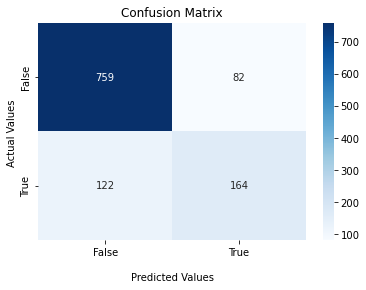

In [146]:
lr_clf= LogisticRegression(**tuned_params)
lr_clf.fit(X_train_log,y_train)

y_pred_lr = lr_clf.predict(X_test_log)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Final Score after Clustering Customers using KMeans (Unsupervised Learning)

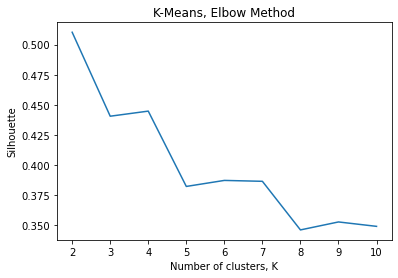

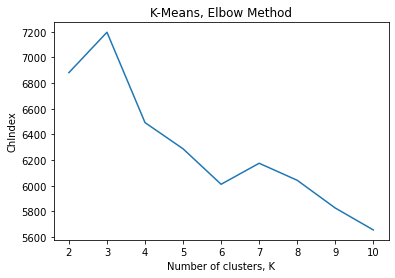

In [172]:
silhouettes = {}
chindex = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(X_train_log)
    silhouettes[k] = silhouette_score(X_train_log, kmeans.labels_, metric='euclidean')
    chindex[k]= calinski_harabasz_score(X_train_log, kmeans.labels_)
    
plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


plt.figure();
plt.plot(list(chindex.keys()), list(chindex.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("ChIndex");


In [182]:
k_means = KMeans(n_clusters=3, random_state=17).fit(X_train_log)
X_train_log['Cluster']=k_means.labels_

In [183]:
k_means = KMeans(n_clusters=3, random_state=17).fit(X_test_log)
X_test_log['Cluster']=k_means.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.3000000000000003, multi_class='ovr')

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.67      0.58      0.62       286

    accuracy                           0.82      1127
   macro avg       0.77      0.74      0.75      1127
weighted avg       0.81      0.82      0.82      1127



Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

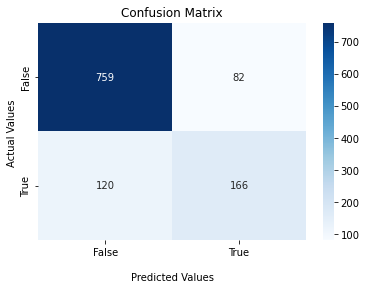

In [187]:
lr_clf= LogisticRegression(**tuned_params)
lr_clf.fit(X_train_log,y_train)

y_pred_lr = lr_clf.predict(X_test_log)

print(classification_report(y_test,y_pred_lr,target_names=class_names))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## CV Score with Unseen Data

In [228]:
te = PolynomialWrapper(ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True))
te.fit(unseenX[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']],unseenY['Churn'].tolist())

temptrain_te=te.transform(unseenX[['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."


In [229]:
unseenX=pd.concat([unseenX,temptrain_te], axis=1)

In [230]:
unseenX.drop(columns=['gender','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],inplace=True)

In [231]:
scaler= FunctionTransformer(np.log1p, validate=True)
scaler.fit(unseenX)

unseenX_templog=scaler.transform(unseenX)

unseenX_log = unseenX.copy()
for i in range(unseenX_templog.shape[1]):
    unseenX_log[X_train_names[i]] = unseenX_templog[:,i]

FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

In [233]:
k_means = KMeans(n_clusters=3, random_state=17).fit(unseenX)
unseenX['Cluster']=k_means.labels_

In [234]:
unseenX.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_1,Partner_1,Dependents_1,tenure_1,PhoneService_1,MultipleLines_1,InternetService_1,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_1,PaperlessBilling_1,PaymentMethod_1,Cluster
1,0,56.95,1889.50,0.247945,0.316556,0.298281,0.235294,0.252974,0.231322,0.177950,0.146341,0.384491,0.254098,0.397626,0.323792,0.320755,0.114478,0.152778,0.142857,0
4,0,70.70,151.65,0.260677,0.316556,0.298281,0.428571,0.252974,0.231322,0.419244,0.400581,0.384491,0.346972,0.397626,0.323792,0.320755,0.391960,0.324130,0.447257,0
11,0,18.95,326.80,0.247945,0.316556,0.298281,0.300000,0.252974,0.231322,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.037975,0.152778,0.174061,0
12,0,100.35,5681.10,0.247945,0.181957,0.298281,0.090909,0.252974,0.279646,0.419244,0.400581,0.384491,0.254098,0.397626,0.287037,0.288760,0.114478,0.152778,0.174061,1
15,0,113.25,7895.15,0.260677,0.181957,0.150000,0.062500,0.252974,0.279646,0.419244,0.146341,0.204167,0.254098,0.160000,0.287037,0.288760,0.037975,0.152778,0.174061,1


In [238]:
X = unseenX
y = unseenY['Churn']

clf_lr= LogisticRegression(**tuned_params)

scores = cross_val_score(clf_lr,X,y,cv=10, scoring="f1_micro")

scores

print("f1_micro: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.80141844, 0.75886525, 0.82978723, 0.82269504, 0.78014184,
       0.78723404, 0.78014184, 0.80851064, 0.80141844, 0.79285714])

f1_micro: 0.80 (+/- 0.04)
